<a href="https://colab.research.google.com/github/lcbjrrr/quantai/blob/main/E5_Py_Stat_ANOVA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Paired Test (Wilcoxon Test)

The Paired Test (Wilcoxon Test), or Wilcoxon Signed-Rank Test, is a statistical method used to compare two related groups or measurements. Think of it for "before and after" scenarios (e.g., testing a new drug) or when you have matched pairs. It's a non-parametric alternative to the paired t-test, meaning it's used when your data doesn't follow a normal distribution. Essentially, it checks if the differences between the pairs are consistently positive or negative, indicating a real change or difference.

In [ ]:

antes= [39, 25, 24, 50, 13, 52, 21, 29, 10, 22, 50, 15, 36, 39, 52, 48, 24, 15, 40, 41, 17, 12, 21, 49, 14, 55, 46, 22, 28, 23, 37, 17, 31, 49, 49]
depois= [16, 8, 12, 0, 14, 16, 13, 12, 19, 17, 17, 2, 15, 10, 20, 13, 0, 4, 16, 18, 16, 16, 9, 9, 18, 4, 17, 0, 11, 14, 0, 19, 2, 9, 6]

from scipy.stats import wilcoxon
sig = 0.05
conf = 1 - sig
n = 35
wilcoxon(antes, depois)
# Conclusion: We reject the hypothesis that there is no difference between the groups, that is, there is a difference between the average number of cigarettes smoked by patients before and after treatment. And as it is possible to verify through the average number of cigarettes smoked per day before (31.86) and after (11.2) the treatment, we can conclude that the treatment presented a satisfactory result.

WilcoxonResult(statistic=np.float64(22.0), pvalue=np.float64(3.119930624961853e-08))

#  Chi-Squared Test

The Chi-Squared test (often written as χ2 test) is a statistical hypothesis test that is widely used in the analysis of categorical data. It helps determine if there is a significant association between two categorical variables or if the observed frequency distribution of a single categorical variable differs from an expected frequency distribution.

|          | Pass | Fail |
|----------|------|------|
| Attended | 25   | 5    |
| Skipped  | 5    | 10   |

In [ ]:
import numpy as np
from scipy.stats import chisquare
data = np.array([[25, 5],
                 [5, 10]])
attend = data[0,:].sum()
skipped = data[1,:].sum()
passed = data[:,0].sum()
failed = data[:,1].sum()
total = data.sum()
print(attend,skipped,passed,failed,total)


30 15 30 15 45




|          | Pass | Fail | Total |
|----------|------|------|-------|
| Attended | 25   | 5    | **30**    |
| Skipped  | 5    | 10   | **15**    |
| **Total**    | **30**   | **15**   | **45**    |




$$T \times P(mRNA) \times P(imu) = total \times \left( \frac{mRNA}{total} \right) \left( \frac{immune}{total}\right) =20.
$$

|          | Pass | Fail |
|----------|------|------|
| Attended | 20   | 10   |  
| Skipped  | 10   | 5    |


In [ ]:

expected = np.array([[total*(attend/total)*(passed/total), total*(attend/total)*(failed/total)],
                   [total*(skipped/total)*(passed/total), total*(skipped/total)*(failed/total)]])
print(expected)


[[20. 10.]
 [10.  5.]]


In [ ]:

stat, p_value = chisquare(data.flatten(), f_exp=expected.flatten())

alpha = 0.05
print(f"Estatística de teste Qui-Quadrado: {stat:.4f}")
print(f"Valor-p: {p_value:.4f}")

if p_value < alpha:
   print("Rejeitamos a hipótese nula de independência")
else:
   print("Não rejeitamos a hipótese nula de independência.")

#Conclusion: Highly Significant Association: The p-value (~0.0008) is much less than 0.05, indicating a very strong statistical association between attendance and academic performance. Large Effect, Students who attended class were 10 times more likely to pass than those who skipped.


Estatística de teste Qui-Quadrado: 11.2500
Valor-p: 0.0104
Rejeitamos a hipótese nula de independência


# ANOVA (Analysis of Variance)

ANOVA is a statistical test used to compare the means of three or more groups to see if they are significantly different. It works by analyzing the variance within each group and between the groups. If the variance between the groups is much larger than within the groups, it suggests the group means are different. The test uses an F-statistic to measure this difference, and a p-value to determine if the differences are statistically significant. If the p-value is small (usually less than 0.05), it indicates that at least one group is different from the others.

## One-way ANOVA (single factor, multiple categories)

ANOVA test using stats.f_oneway() to compare the means of three groups: type_1, type_0, and type_n. The function checks if there are any significant differences between the average values of the three groups. It returns the F-statistic and the p-value, which indicate whether the differences between the group means are statistically significant. A small p-value (typically less than 0.05) suggests that at least one group is different from the others.

In [ ]:
import numpy as np
import scipy.stats as stats
type_1 = [9.67, 8.50, 8.33]
type_0 = [5.00, 5.33, 6.67]
type_n = [7.33, 6.67, 7.99]
print(np.mean(type_1),np.mean(type_0),np.mean(type_n))

8.833333333333334 5.666666666666667 7.330000000000001


In [ ]:
import pandas as pd
import seaborn as sns
grades = pd.DataFrame({
    "type": ['1', '1', '1', '0', '0', '0', '-1', '-1', '-1'],
    "grade": [9.67, 8.50, 8.33, 5.00, 5.33, 6.67, 7.33, 6.67, 7.99]})
grades

,type,grade
0,1,9.67
1,1,8.50
2,1,8.33
3,0,5.00
4,0,5.33
5,0,6.67
6,-1,7.33
7,-1,6.67
8,-1,7.99


<Axes: xlabel='type', ylabel='grade'>

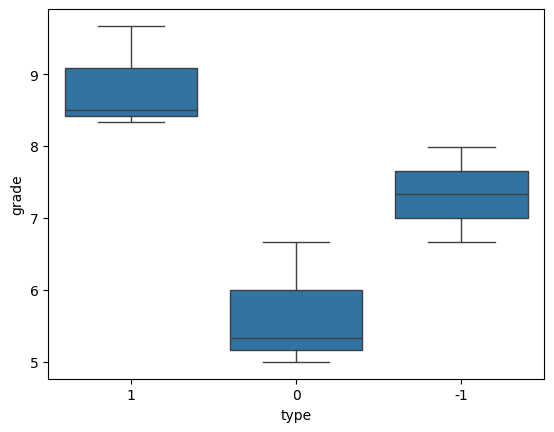

In [ ]:
sns.boxplot(y='grade',x='type',data=grades)

In [ ]:
stats.f_oneway(type_1,type_0,type_n)

F_onewayResult(statistic=12.903337015732738, pvalue=0.006712726872406345)

## Using OLS (and anova_lm)



Let's creates an Ordinary Least Squares (OLS) regression model with ols('grade ~ C(type)', data=grades), where grade is the dependent variable and type is the independent variable. The C(type) indicates that type is a categorical variable. After fitting the model, anova_lm(model, typ=2) performs the ANOVA test and returns a table with the sum of squares, F-statistic, and p-value to determine if there is a significant effect of type on grade.

In [ ]:
import pandas as pd
grades = pd.DataFrame({
    "type": [1, 1, 1, 0, 0, 0, -1, -1, -1],
    "grade": [9.67, 8.50, 8.33, 5.00, 5.33, 6.67, 7.33, 6.67, 7.99]})
#grades

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
model = ols('grade ~ C(type)', data=grades).fit()
anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(type),15.054467,2.0,12.903337,0.006713
Residual,3.500133,6.0,NaN,NaN


## Two-way ANOVA (two or more factors)

 Let's perform a two-way ANOVA, creating an OLS regression model with ols('grade ~ C(type) * C(gender)', data=grades), where grade is the dependent variable, and type and gender are independent variables. The C(type) * C(gender) indicates that both type and gender are categorical variables, and the interaction between them is considered. After fitting the model, anova_lm(model, typ=2) performs the ANOVA test and returns a table showing the sum of squares, F-statistic, and p-value, helping determine if type, gender, or their interaction significantly affects grade.

In [ ]:
import pandas as pd
grades = pd.DataFrame({
    "type": [1, 1, 1, 0, 0, 0, -1, -1, -1],
    "gender":[1,0,0,0,0,1,0,0,1],
    "grade": [9.67, 8.50, 8.33, 5.00, 5.33, 6.67, 7.33, 6.67, 7.99]})
grades

,type,gender,grade
0,1,1,9.67
1,1,0,8.50
2,1,0,8.33
3,0,0,5.00
4,0,0,5.33
5,0,1,6.67
6,-1,0,7.33
7,-1,0,6.67
8,-1,1,7.99


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
model = ols('grade ~ C(type) * C(gender)', data=grades).fit()
anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(type),15.054467,2.0,78.764213,0.002555
C(gender),3.125000,1.0,32.699686,0.010612
C(type):C(gender),0.088433,2.0,0.462679,0.668133
Residual,0.286700,3.0,NaN,NaN


The ANOVA results show that both type (F = 78.76, p = 0.0026) and gender (F = 32.70, p = 0.0106) have a significant effect on grades, as their p-values are less than 0.05. However, the interaction between type and gender (F = 0.46, p = 0.6681) is not significant, indicating that the combined effect of type and gender on grades is not different from their individual effects. The residual sum of squares is 0.29, representing unexplained variance in the data.

# Activities

## Activity 1)

An insurance company implemented a new loyalty program for its customers. A satisfaction survey was conducted with a paired sample of 10 customers, recording the level of satisfaction of each customer before (control group) and after (treated group) the implementation of the program.

before = [7, 8, 6, 7, 9, 5, 8, 6, 7, 9]

after = [6, 9, 5, 8, 9, 7, 8, 5, 6, 9]


In [ ]:

import numpy as np
from scipy.stats import wilcoxon

satisfacao_vida = [7, 8, 6, 7, 9, 5, 8, 6, 7, 9, 6, 9, 5, 8, 9, 7, 8, 5, 6, 9]

satisfacao_saude = [8, 9, 7, 8, 9, 6, 9, 7, 8, 9, 7, 9, 6, 9, 9, 8, 9, 7, 7, 9]

print(np.mean(satisfacao_vida),np.mean(satisfacao_saude))

statistic, p_value = wilcoxon(satisfacao_vida, satisfacao_saude)

print(f'Estatística do teste: {statistic}')
print(f'Valor-p: {p_value}')


alpha = 0.05
if p_value < alpha:
    print("Rejeita a hipótese nula: há diferença significativa entre os tipos de seguro.")
else:
    print("Não rejeita a hipótese nula: não há diferença significativa entre os tipos de seguro.")

7.2 8.0
Estatística do teste: 0.0
Valor-p: 0.00016244084518680075
Rejeita a hipótese nula: há diferença significativa entre os tipos de seguro.


## Activity 2)

An insurance company wants to evaluate the relationship between the type of policy purchased by customers (auto or home) and the gender of the customers. To do this, data was collected from a random sample of 400 of the company's customers.

|              | Automóvel | Residencial | Total |
|--------------|-----------|-------------|-------|
| Homens       | 120       | 80          | 200   |
| Mulheres     | 100       | 100         | 200   |
| Total        | 220       | 180         | 400   |

In [ ]:
import numpy as np
from scipy.stats import chisquare
data = np.array([[120, 80],
                [100, 100]])

man = data[0,:].sum()
wom = data[1,:].sum()
auto = data[:,0].sum()
res = data[:,1].sum()
total = data.sum()

expected = np.array([[total*(man/total)*(auto/total), total*(man/total)*(res/total)],
                    [total*(wom/total)*(auto/total), total*(wom/total)*(res/total)]])
print(expected)

stat, p_value = chisquare(data.flatten(), f_exp=expected.flatten())

alpha = 0.05
print(f"Estatística de teste Qui-Quadrado: {stat:.4f}")
print(f"Valor-p: {p_value:.4f}")

if p_value < alpha:
    print("Rejeitamos a hipótese nula de independência.")
else:
    print("Não rejeitamos a hipótese nula de independência.")

[[110.  90.]
 [110.  90.]]
Estatística de teste Qui-Quadrado: 4.0404
Valor-p: 0.2571
Não rejeitamos a hipótese nula de independência.


In [ ]:
import scipy.stats as stats
from math import sqrt
chi = stats.chi2_contingency(data)
print(chi)
chi[0]
n=data.sum()
sqrt(chi[0]/n)

Chi2ContingencyResult(statistic=3.646464646464646, pvalue=0.056188362588138654, dof=1, expected_freq=array([[110.,  90.],
       [110.,  90.]]))


0.09547859244962514

## Activity 3)

Is there a significant difference between the average prices of Basic, Complete and Premium auto insurance plans?"

| Plano | *Preço Mensal ($)* |  |  |  |  |
| :---- | ----- | ----: | ----: | ----: | ----: |
| ***Básico*** | 50 | 60 | 45 | 55 | 52 |
| ***Completo*** | 80 | 75 | 85 | 90 | 78 |
| ***Premium*** | 120 | 110 | 130 | 125 | 115 |


In [ ]:
from scipy import stats

basico = [50, 60, 45, 55, 52]
completo = [80, 75, 85, 90, 78]
premium = [120, 110, 130, 125, 115]


f_statistic, p_value = stats.f_oneway(basico, completo, premium)

print("F-statistic:", f_statistic)
print("p-value:", p_value)

if p_value < 0.05:
    print("Há evidência estatística para rejeitar a hipótese nula.")
    print("Existe diferença significativa entre os preços médios dos planos.")
else:
    print("Não há evidência estatística para rejeitar a hipótese nula.")
    print("Não há diferença significativa entre os preços médios dos planos.")

F-statistic: 133.55848179705666
p-value: 6.3149524478101125e-09
Há evidência estatística para rejeitar a hipótese nula.
Existe diferença significativa entre os preços médios dos planos.


## Activity 4)

Re do the last one with OLS

In [ ]:
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
anova_lm(model)

# Create a DataFrame for easier data handling
data = {'Plano': ['Básico'] * 5 + ['Completo'] * 5 + ['Premium'] * 5,
        'Preço': [50, 60, 45, 55, 52, 80, 75, 85, 90, 78, 120, 110, 130, 125, 115]}
df = pd.DataFrame(data)

# Fit the OLS model
model = ols('Preço ~ C(Plano)', data=df).fit()

# Perform ANOVA
anova_table = anova_lm(model, typ=2)

print(anova_table)

                sum_sq    df           F        PR(>F)
C(Plano)  11494.933333   2.0  133.558482  6.314952e-09
Residual    516.400000  12.0         NaN           NaN


## Activity 5)

Use multiple linear regression (OLS) to assess how the factors "insurance plan" (Basic, Full, Premium) and "gender" (Male, Female) individually and together influence the average price of auto insurance.

In [ ]:
import pandas as pd
import statsmodels.api as sm

data = {'Plano': [-1,-1,-1,-1,-1,0,0,0,0,0,1,1,1,1,1],
        'Genero': [0,1,0,0,0,0,0,1,1,0,0,0,1,1,0],
        'Preco': [50, 60, 45, 55, 52, 80, 75, 85, 90, 78, 120, 110, 130, 125, 115]}
df = pd.DataFrame(data)

model = ols('Preco ~ C(Plano) * C(Genero)', data=df).fit()
anova_table = anova_lm(model, typ=2)
print(anova_table)

                          sum_sq   df           F        PR(>F)
C(Plano)            10531.400000  2.0  336.904976  3.465309e-09
C(Genero)             369.800000  1.0   23.660190  8.906697e-04
C(Plano):C(Genero)      5.933333  2.0    0.189810  8.303430e-01
Residual              140.666667  9.0         NaN           NaN


In [ ]:
df

,Plano,Genero,Preco
0,-1,0,50
1,-1,1,60
2,-1,0,45
3,-1,0,55
4,-1,0,52
5,0,0,80
6,0,0,75
7,0,1,85
8,0,1,90
9,0,0,78


# R

## Oneway ANOVA

In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R
library(stats)
library(ggplot2)

In [ ]:
%%R
type_1 <- c(9.67, 8.50, 8.33)
type_0 <- c(5.00, 5.33, 6.67)
type_n <- c(7.33, 6.67, 7.99)
grades_df <- data.frame(
  type = factor(rep(c("1", "0", "-1"), each = 3)),
  grade = c(type_1, type_0, type_n)
)
grades_df

  type grade
1    1  9.67
2    1  8.50
3    1  8.33
4    0  5.00
5    0  5.33
6    0  6.67
7   -1  7.33
8   -1  6.67
9   -1  7.99


In [ ]:
%%R
summary(aov(grade ~ type, data = grades_df))

            Df Sum Sq Mean Sq F value  Pr(>F)   
type         2  15.05   7.527    12.9 0.00671 **
Residuals    6   3.50   0.583                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


# Two-way ANOVA

In [ ]:
%%R
grades <- data.frame(
    type = factor(c(1, 1, 1, 0, 0, 0, -1, -1, -1)),
    gender = factor(c(1, 0, 0, 0, 0, 1, 0, 0, 1)),
    grade = c(9.67, 8.50, 8.33, 5.00, 5.33, 6.67, 7.33, 6.67, 7.99)
)
grades


  type gender grade
1    1      1  9.67
2    1      0  8.50
3    1      0  8.33
4    0      0  5.00
5    0      0  5.33
6    0      1  6.67
7   -1      0  7.33
8   -1      0  6.67
9   -1      1  7.99


In [ ]:
%%R
model <- aov(grade ~ type * gender, data = grades)
summary(model)

            Df Sum Sq Mean Sq F value  Pr(>F)   
type         2 15.054   7.527  78.764 0.00255 **
gender       1  3.125   3.125  32.700 0.01061 * 
type:gender  2  0.088   0.044   0.463 0.66813   
Residuals    3  0.287   0.096                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
